### Neste projeto iremos verificar qual o modelo de regressão, por meio do machine learning, obterá os melhores resultados nos modelos de avaliação.

Modelos de regressão utilizados:
    
    Decision Tree Regressor
    Linear Regression
    Lasso Lars
    Ridge Regression
    SVR
    Random Forest Regression
    Logistic Regression
    Bayesian Ridge
    Gradient Boostring
    
Ações realizadas:

    1. Importação das bibliotecas utilizadas
    2. Importanção e verificação do dataset
    3. Tratamento dos valores vazios/nulos
    4. Verificação por meio de gráficos da variável alvo e da correlação
    5. Verificando e tratando as colunas do dataset
    6. Dividindo em treino e teste
    7. Definindo os modelos avaliação
    8. Definindo os modelos de regressão
    9. Avaliando os modelos de regressão


Conclusão:

    O melhor resultado obtido foi do modelo Gradient Boosting com um resultado no  Root Mean Squared Log Error (RMSLE) de 0.13896 . Neste exercício não foram analisados nem retirados os outliers
    
    
    
    


In [1]:
# Importando as bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, LassoLars, SGDRegressor, Ridge, LogisticRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_squared_log_error

In [2]:
# Importando os datasets
ds_train = pd.read_csv('train.csv')

In [ ]:
# Verificando a base train
ds_train.info()

In [11]:
# Verificando os valores nulos/vazios
ds_train.isnull().sum()[ds_train.isnull().sum() != 0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

##### Acima é possível verificar que existem muitas colunas com valores vazios. Para tratar iremos procurar alguma relação para que possamos substituir ou inserir dados a estes valores vazios.


In [12]:
# Substituindo os valores
ds_train['PoolQC'].fillna("None",inplace=True)
ds_train['MiscFeature'].fillna("None",inplace=True)
ds_train['Alley'].fillna("None",inplace=True)
ds_train['Fence'].fillna("None",inplace=True)
ds_train['FireplaceQu'].fillna('None',inplace=True)
ds_train.loc[ds_train['LotFrontage'].isnull(), 'LotFrontage'] = ds_train['LotFrontage'].mean()
ds_train['GarageType'].fillna('None',inplace=True)
ds_train.loc[ds_train['GarageYrBlt'].isnull(), 'GarageYrBlt'] = ds_train['GarageYrBlt'].mean()
ds_train['GarageFinish'].fillna('None',inplace=True)
ds_train['GarageQual'].fillna('None',inplace=True)
ds_train['GarageCond'].fillna('None',inplace=True)
ds_train['BsmtExposure'].fillna('None',inplace=True)
ds_train['BsmtFinType2'].fillna('None',inplace=True)
ds_train['BsmtFinType1'].fillna('None',inplace=True)
ds_train['BsmtCond'].fillna("None",inplace=True)
ds_train['BsmtQual'].fillna("None",inplace=True)
ds_train['MasVnrType'].fillna('None',inplace=True)
ds_train['MasVnrArea'].fillna(0,inplace=True)
ds_train = ds_train[ds_train['Electrical'].isnull() != True]

In [13]:
# Verificando novamente se ainda há valores vazios/nulos

ds_train.isnull().sum()[ds_train.isnull().sum() != 0].sort_values(ascending=False)

Series([], dtype: int64)

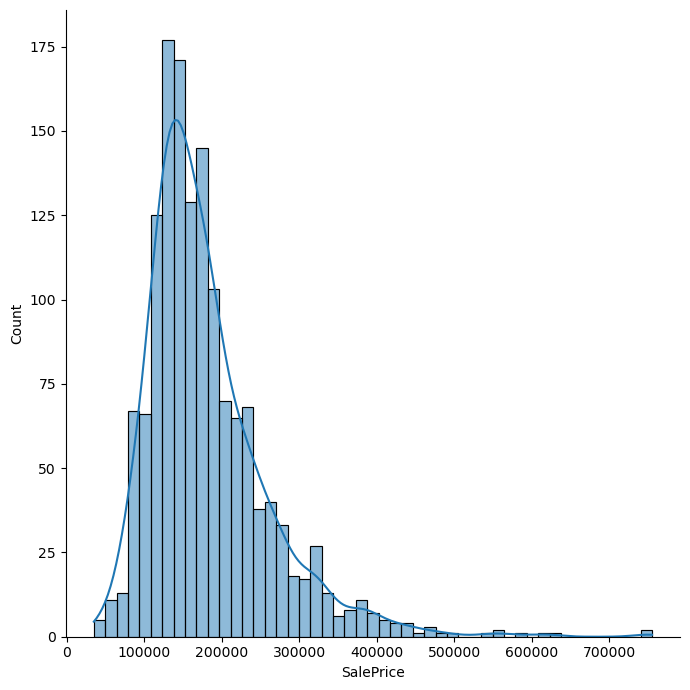

In [3]:
# Verificando graficamente a variável algo
sns.displot(x=ds_train['SalePrice'], kde=True, height=7);

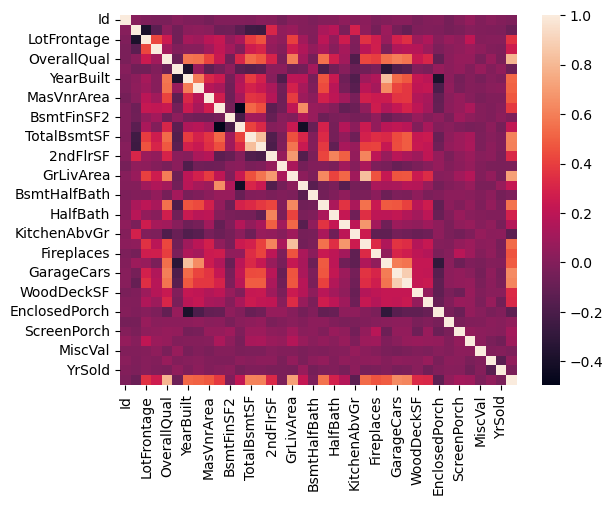

In [10]:
# Verificando a correlação entre as variáveis
sns.heatmap(ds_train.corr())
plt.show()

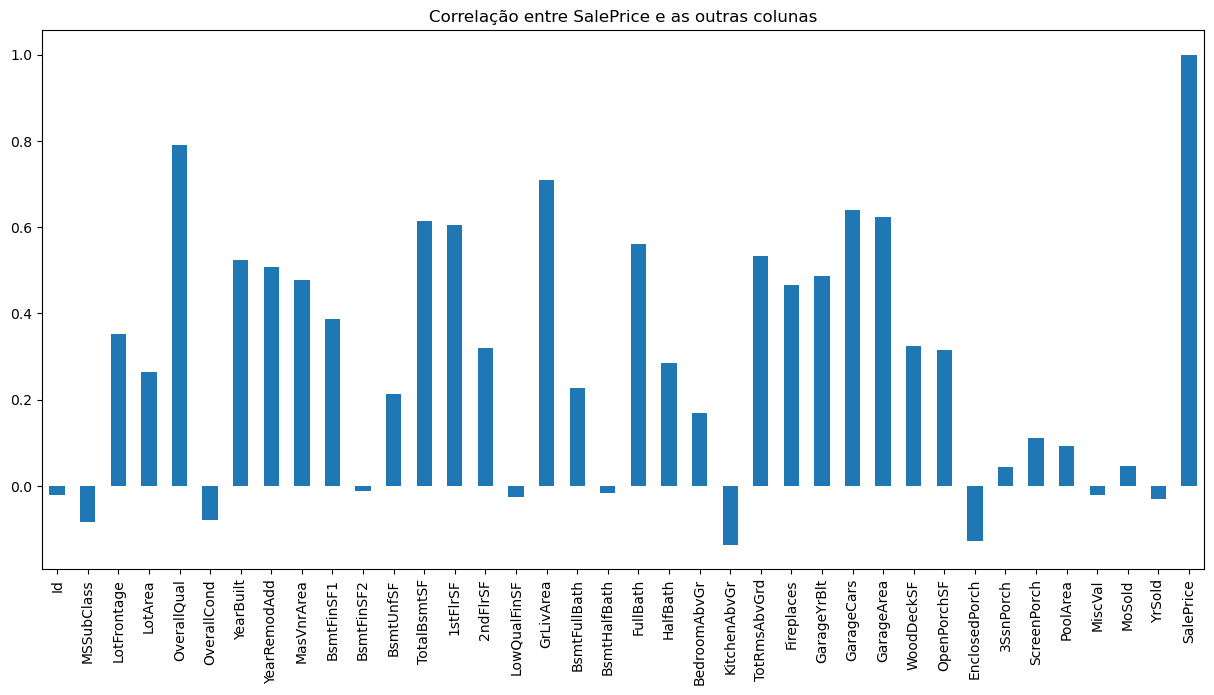

In [7]:
# Correlação entre SalePrice e as outras variáveis
ds_train.corr()['SalePrice'].plot(kind='bar',figsize=(15,7),title='Correlação entre SalePrice e as outras variáveis')
plt.show()

In [14]:
# Definindo as colunas categóricas e numéricas
categorical_features = ds_train.select_dtypes(include = ["object"]).columns
numerical_features = ds_train.select_dtypes(exclude = ["object"]).columns
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
train_num = ds_train[numerical_features]
train_cat = ds_train[categorical_features]
print(train_num.shape)
print(train_cat.shape)

Numerical features : 38
Categorical features : 43
(1459, 38)
(1459, 43)


In [15]:
# Utilizando o get_dummies nas colunas categóricas
train_cat = pd.get_dummies(train_cat)
train_cat.shape

(1459, 266)

In [16]:
# Juntando as novas colunas categóricas com as colunas numéricas
ds_train = pd.concat([train_cat,train_num],axis=1)
ds_train.shape

(1459, 304)

In [17]:
# Atribuindo as variáveis
y = ds_train['SalePrice']
X = ds_train.drop('SalePrice', axis=1)

In [18]:
# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
# Definindo os modelos de avaliação
def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true,y_pred)
    mse = mean_squared_error(y_true,y_pred)
    rsquare = r2_score(y_true,y_pred)
    rmse = mean_squared_error(y_true,y_pred,squared = False)
    try:
        rmsle = mean_squared_log_error(y_true,y_pred,squared = False)
    except:
        rmsle = np.nan
    return mae, mse, rsquare, rmse, rmsle

In [20]:
# Modelos de regressão a serem utilizados
model_list = {
    'decision_tree_regression':DecisionTreeRegressor(random_state = 3),
    'linear_regression':LinearRegression(),
    'lasso_lars':LassoLars(alpha=41,eps=1.38,random_state = 3,normalize=False),
    'ridge_regression':Ridge(alpha=1778,random_state=3),
    'SVR': SVR(),
    'random_forest_regression':RandomForestRegressor(n_estimators=400,random_state = 3),
    'logistic_regression':LogisticRegression(random_state = 3),
    'gradient_boosting':GradientBoostingRegressor(random_state = 3),
}

In [21]:
# Avaliando os modelos

score = dict()
for key in model_list.keys():
    model = model_list[key].fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    score[key] = evaluate(y_test ,y_pred_test)
score_df = pd.DataFrame(score).T.round(5)
score_df.columns=['MAE','MSE','R2 Square','RMSE','RMSLE']
score_df


C:\Users\luans\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:682: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 107 iterations, alpha=1.779e+02, previous alpha=1.779e+02, with an active set of 94 regressors.
  warnings.warn(
C:\Users\luans\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,MAE,MSE,R2 Square,RMSE,RMSLE
decision_tree_regression,25975.52740,1.536437e+09,0.74721,39197.40672,0.21235
linear_regression,30384.97292,1.859027e+10,-2.05860,136346.12446,0.25012
lasso_lars,17654.27098,6.674931e+08,0.89018,25835.88819,0.14502
ridge_regression,20595.18782,9.711488e+08,0.84022,31163.26030,0.17251
SVR,56416.68244,6.270725e+09,-0.03170,79187.91136,0.40581
random_forest_regression,16818.57372,7.050502e+08,0.88400,26552.78100,0.14648
logistic_regression,38692.35274,3.236084e+09,0.46758,56886.58803,0.28836
gradient_boosting,15965.81599,6.579118e+08,0.89176,25649.79232,0.13896
